Adam Abate
CS 520 - Neural Networks for Machine Learning
3/23/19

In [18]:
import random

class Perceptron:
    
    def __init__(self):
        
        # Initialize the current perceptron weights.
        self.w0 = 0.1
        self.w1 = 0.1
        self.w2 = 0.1
        
        # Initialize error trackers.
        self.wHatErr = []
        self.wErr = []
        
        # Initialize catalog of all weights (for T iterations of pocket) -- persisted or not.
        self.wAll = []
        # Initialize catalog of weights (for T iterations of pocket) -- only persisted.
        self.wHatAll=[]

    def predict(self, x1, x2):
        
        prediction = self.w0 + self.w1*x1 + self.w2*x2
        
        if (prediction < 0):
            return -1
        
        if (prediction > 0):
            return 1
        
    def isMisclassified(self, data):
        
        #Set a counter for the number of correctly classified data points
        numCorrClass = 0
        
        for i in range(0, len(data)):
            
            prediction = self.predict(data[i][0], data[i][1])
            
            #If a single data point is misclassified, we stop checking -> return True
            if (prediction != data[i][2]):
                break
            
            else:
                numCorrClass += 1
        
        #If all data points have been correctly classified, misclassified is False
        if (numCorrClass == len(data)):
            return False
        
        else:
            return True
        
    
    def PLA(self, data):
    
        misclassified = True
    
        while (misclassified == True):
            
            i = random.randint(0, len(data)-1)
            
            #First two columns of data are x1 and x2, respectively
            prediction = self.predict(data[i][0], data[i][1])
        
            #Third column of data is y         
            if (prediction == 1 and data[i][2] == -1):
                #Adjusted weights are initial weights plus target output times input
                #print("Adjusted weight for data point "+ str(i))
                self.w0 += data[i][2]*1
                self.w1 += data[i][2]*data[i][0]
                self.w2 += data[i][2]*data[i][1]
            
            elif (prediction == -1 and data[i][2] == 1):
                #Adjusted weights are initial weights plus target output times input
                #print("Adjusted weight for data point "+ str(i))
                self.w0 += data[i][2]*1
                self.w1 += data[i][2]*data[i][0]
                self.w2 += data[i][2]*data[i][1]
            
            misclassified = self.isMisclassified(data)
    
    def pocketPLA(self, data, iters):
    
        # Initialize iteration tracker.
        i = 0
    
        while (i < iters):
            
            j = random.randint(0, len(data)-1)
            
            #First two columns of data are x1 and x2, respectively
            prediction = self.predict(data[j][0], data[j][1])
        
            #Initialize weights for time period i+1
            w0 = 0
            w1 = 0
            w2 = 0
            
            #Third column of data is y         
            if (prediction == 1 and data[j][2] == -1):
                #Adjusted weights are initial weights plus target output times input
                #print("Adjusted weight for data point "+ str(i))
                w0 = self.w0 + data[j][2]*1
                w1 = self.w1 + data[j][2]*data[j][0]
                w2 = self.w2 + data[j][2]*data[j][1]
            
            elif (prediction == -1 and data[j][2] == 1):
                #Adjusted weights are initial weights plus target output times input
                #print("Adjusted weight for data point "+ str(i))
                w0 = self.w0 + data[j][2]*1
                w1 = self.w1 + data[j][2]*data[j][0]
                w2 = self.w2 + data[j][2]*data[j][1]
            
            #Check that error of time period i+1 weights is reduced. If so, use these weights in future iterations.
            if (self.calcError(w0, w1, w2, data) < self.calcError(self.w0, self.w1, self.w2, data)):
                self.w0 = w0
                self.w1 = w1
                self.w2 = w2
                
            # Update error tracker for persisted weights.
            self.wHatErr.append(self.calcError(self.w0, self.w1, self.w2, data))
            
            # Update general error tracker, regardless of if weights are persisted.
            self.wErr.append(self.calcError(w0, w1, w2, data))
            
            self.wAll.append([w0, w1, w2])
            self.wHatAll.append([self.w0, self.w1, self.w2])
                
            i += 1
    
    def calcError(self, w0, w1, w2, data):
        
        err = 0
        
        # Iterate through every example, making a prediction for each.
        for ex in range(len(data)):
            pred = w0 + w1*data[ex][0] + w2*data[ex][1]
        
            if (pred < 0):
                pred = -1

            if (pred > 0):
                pred = 1
            
            # If the prediction on this example doesn't match the target, increment error
            if (pred != data[ex][2]):
                err += 1.0/len(data)
            
        return err          
        
    def getDecisionBoundary(self):
        
        return [self.w0, self.w1, self.w2]

    def getErrorTrackers(self):
        return [self.wErr, self.wHatErr]
    
    def getAllIterWeights(self):
        return self.wAll
    
    def getAllIterWHats(self):
        return self.wHatAll

In [3]:
#RANDOMLY GENERATE TARGET FUNCTION
#Three dimensions of tf correspond to bias, w1, and w2 of target function
w = [random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10)]
w

[-2.9166895198857556, -8.440488776516409, 7.6115848266576585]

In [19]:
#RANDOMLY GENERATE DATA AROUND TARGET FUNCTION
posCount = 0
negCount = 0
data = []
N = 100

# Create 50 datapoints on one side of the target function
while (posCount < N/2):
    
    x1 = random.uniform(0, 10)
    x2 = random.uniform(0, 10)
    
    if (w[0] + x1*w[1] + x2*w[2] > 0):
        posCount += 1
        data.append([x1, x2, 1])

# Create 50 datapoints on the other side of the target function
while (negCount < N/2):
    
    x1 = random.uniform(0, 10)
    x2 = random.uniform(0, 10)
    
    if (w[0] + x1*w[1] + x2*w[2] < 0):
        negCount += 1
        data.append([x1, x2, -1])

data

[[4.745704767321496, 9.597821621513742, 1],
 [6.649075163932583, 8.264825959290986, 1],
 [4.028030275190942, 5.354154136539984, 1],
 [0.40861627457297156, 4.257090826086335, 1],
 [5.060655787733559, 5.995603477466556, 1],
 [3.361632631014607, 6.893041858768233, 1],
 [0.5749524433297137, 8.279786977653073, 1],
 [0.4006922211809316, 5.915771081311611, 1],
 [1.1645522630368799, 9.850588117292888, 1],
 [2.3129320418172328, 9.7435457104386, 1],
 [4.89340868964205, 8.647194459073686, 1],
 [4.077560205510964, 9.56484077700014, 1],
 [0.6601872566270339, 9.250985587844687, 1],
 [2.826058135795156, 5.192891723584971, 1],
 [1.0452691313540607, 3.2921521538285434, 1],
 [6.199063791584296, 9.946576388330628, 1],
 [0.47359270196465464, 2.3830475453728295, 1],
 [3.7589828081912913, 9.015003339179975, 1],
 [2.759951713574713, 9.917910663885552, 1],
 [2.778231315208197, 7.337269619265236, 1],
 [3.932051271086532, 7.173609042069992, 1],
 [5.551088597084481, 9.798950035007923, 1],
 [1.9512157915354134, 7

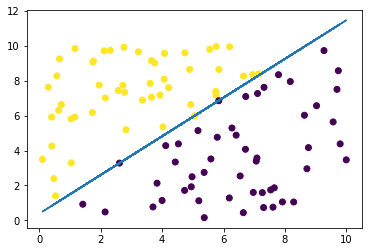

In [20]:
# DISPLAY DATA AND THEIR CLASSIFICATIONS
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data1 = np.array(data)

plt.scatter(data1[:,0], data1[:,1], c=data1[:,2])
#y = []
#x = []
#for i in range(0, 10):
#    x.append(i)
#    y.append()
    
db = lambda ex: -(w[0] + w[1]*ex[0])/w[2]
db = map(db, data1)
plt.plot(data1[:,0], list(db))

plt.plot()
plt.show()

In [21]:
# NEW TO 3.2: Flip labels of N/10 randomly selected targets

# N/10 = 10 times...
for i in range(0, N//10):
    
    # Randomly select an example.
    n = random.randint(0,N-1)
    
    print("Example",n)
    print(data[n])
    # Flip the example's label.
    if (data[n][2] == -1):
        data[n][2] = 1
    else:
        data[n][2] = -1
    print(data[n])

Example 14
[1.0452691313540607, 3.2921521538285434, 1]
[1.0452691313540607, 3.2921521538285434, -1]
Example 53
[5.794681064170825, 4.75987102817551, -1]
[5.794681064170825, 4.75987102817551, 1]
Example 26
[1.7601454716415432, 9.12533852298138, 1]
[1.7601454716415432, 9.12533852298138, -1]
Example 43
[2.57109503435762, 7.440049227705319, 1]
[2.57109503435762, 7.440049227705319, -1]
Example 17
[3.7589828081912913, 9.015003339179975, 1]
[3.7589828081912913, 9.015003339179975, -1]
Example 74
[7.106266502943399, 7.268033405467483, -1]
[7.106266502943399, 7.268033405467483, 1]
Example 7
[0.4006922211809316, 5.915771081311611, 1]
[0.4006922211809316, 5.915771081311611, -1]
Example 34
[5.848552556934921, 8.646020663495857, 1]
[5.848552556934921, 8.646020663495857, -1]
Example 67
[5.194925628057168, 1.1209555885523703, -1]
[5.194925628057168, 1.1209555885523703, 1]
Example 35
[3.6559508738987634, 9.1505770956964, 1]
[3.6559508738987634, 9.1505770956964, -1]


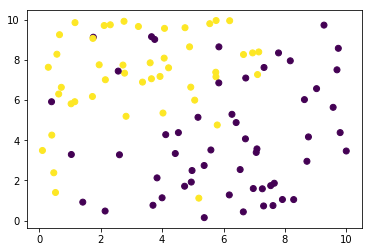

In [22]:
# DISPLAY DATA AND THEIR CLASSIFICATIONS -- Note that the data is now not linearly separable
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data1 = np.array(data)

plt.scatter(data1[:,0], data1[:,1], c=data1[:,2])
#y = []
#x = []
#for i in range(0, 10):
#    x.append(i)
#    y.append()
    
plt.plot()
plt.show()

In [23]:
# TRAIN THE PERCEPTRON -- pocket PLA with 1000 iterations
perceptron = Perceptron()
perceptron.pocketPLA(data, 1000)
print(perceptron.getDecisionBoundary())

[0.09999999999999998, -3.9205914620603055, 2.7401287738142575]


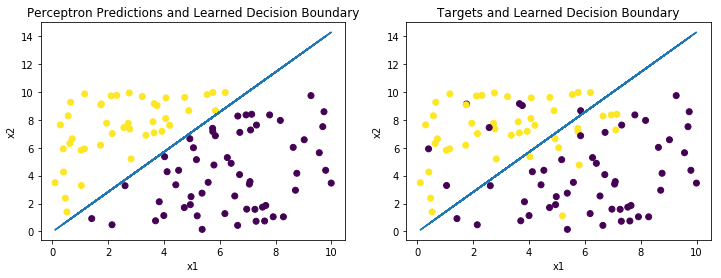

In [24]:
# MAKE AND PLOT PERCEPTRON PREDICTIONS
data2 = np.array(data)

for i in range(len(data2)):
    data2[i,2] = perceptron.predict(data2[i,0], data2[i,1])

# I'm just going to practice with matplotlib's O-O components while I do this
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First, plot predictions and the decision boundary
ax1.set_title("Perceptron Predictions and Learned Decision Boundary")
ax1.set_ylabel("x2")
ax1.set_xlabel("x1")

# If this plot looks like the one above, all points have been classified correctly.
ax1.scatter(data2[:,0], data2[:,1], c=data2[:,2])

# Plot the learned decision boundary.
db = lambda ex: -(perceptron.w0 + perceptron.w1*ex[0])/perceptron.w2
db = map(db, data2)
ax1.plot(data2[:,0], list(db))

# Second, plot actual data and the decision boundary
ax2.set_title("Targets and Learned Decision Boundary")
ax2.set_ylabel("x2")
ax2.set_xlabel("x1")

ax2.scatter(data1[:,0], data1[:,1], c=data1[:,2])
db = lambda ex: -(perceptron.w0 + perceptron.w1*ex[0])/perceptron.w2
db = map(db, data2)
ax2.plot(data2[:,0], list(db))


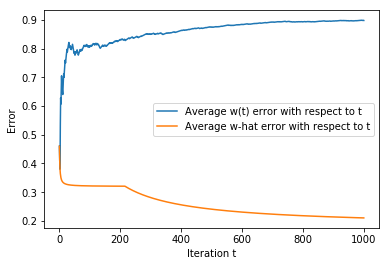

In [31]:
# Plot averages of error trackers

def timeAvg(err):
    
    # Initialize a sum of all errors up to time t
    errSum = 0
    
    # Initialize an average error tracker
    avgErr = []
    
    for t in range(0, len(err)):
        
        # Increment the error sum to account for error in time t.
        errSum += float(err[t])
        
        # Calculate the average error up to time t.
        avg = errSum / (t+1)
        
        # Append the average error to our tracker.
        avgErr.append(avg)
    
    return avgErr

# Repeat experiment 20 times.
wErrExp = []
wHatErrExp = []
for i in range(0, 20):
    wErr, wHatErr = perceptron.getErrorTrackers()

    wErrAvg = timeAvg(wErr)
    wHatErrAvg = timeAvg(wHatErr)
    
    wErrExp.append(wErrAvg)
    wHatErrExp.append(wHatErrAvg)

# Now take mean of errors in each time step over 20 experiments.
wErrAvg, wHatErrAvg = [], []
# Iterate over each time step.
for j in range(0, len(wErrExp[0])):
    # Iterate over each experiment.
    wErrSum = 0
    wHatErrSum = 0
    for i in range(0,20):
        wErrSum += wErrExp[i][j]
        wHatErrSum += wHatErrExp[i][j]   
    wErrAvg.append(wErrSum/20.0)
    wHatErrAvg.append(wHatErrSum/20.0)

t = np.arange(len(wErr)) + 1

fig, ax = plt.subplots()
ax.plot(t, wErrAvg, label="Average w(t) error with respect to t")
ax.plot(t, wHatErrAvg, label="Average w-hat error with respect to t")
ax.legend()
ax.set_xlabel("Iteration t")
ax.set_ylabel("Error")

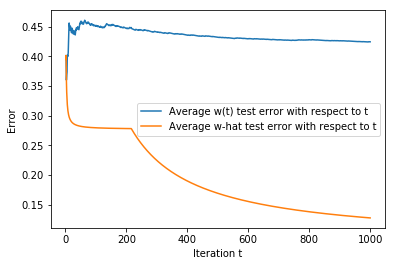

In [32]:
# First, create the test test.
NTest = 1000

x1 = []
x2 = []

for i in range(0, NTest):
    
    x1.append(random.uniform(0, 10))
    x2.append(random.uniform(0, 10))
    
wErrExp = []
wHatErrExp = []
# Perform experiment 20 times.
for i in range(0, 20):

    #---------------
    # Calculate E_out(w-hat) for all time periods t.

    wHatAll = perceptron.getAllIterWHats()

    errWHatTracker = []
    # Iterate through each time period.
    for t in range(0, len(wHatAll)):

        errWHatTest = 0
        # Iterate through each element of the test set.
        for i in range(0, NTest):

            # Get our perceptron's prediction at time t
            if (wHatAll[t][0] + x1[i]*wHatAll[t][1] + x2[i]*wHatAll[t][2] > 0):
                pred = 1
            else:
                pred = -1

            # Figure out classification of target
            target = None
            if (w[0] + x1[i]*w[1] + x2[i]*w[2] > 0):
                target = 1
            else:
                target = -1

            # If the point is misclassified, increment error
            if (target != pred):
                errWHatTest += 1/NTest

        # Append average error for time period t's w-hats.
        errWHatTracker.append(errWHatTest)

    # Calculate list of average errors with respect to t.
    errWHatAvg = timeAvg(errWHatTracker)
    
    # Append to matrix holding a row of cumulative avgs for 20 experiments.
    wHatErrExp.append(errWHatAvg)

    #---------------
    # Calculate E_out(w(t)) for all time periods t.

    wAll = perceptron.getAllIterWeights()

    errWTracker = []
    # Iterate through each time period.
    for t in range(0, len(wAll)):

        errWTest = 0
        # Iterate through each element of the test set.
        for i in range(0, NTest):

            # Get perceptron's prediction at time t.
            if (wAll[t][0] + x1[i]*wAll[t][1] + x2[i]*wAll[t][2] > 0):
                pred = 1
            else:
                pred = -1

            # Get classification of target.
            target = None
            if (w[0] + x1[i]*w[1] + x2[i]*w[2] > 0):
                target = 1
            else:
                target = -1

             # If the point is misclassified, increment error.
            if (target != pred):
                errWTest += 1/NTest

        # Append average error for time period t's weights.
        errWTracker.append(errWTest)

    # Calculate list of average errors with respect to t.
    errWAvg = timeAvg(errWTracker)
    
    # Append to matrix holding a row of cumulative avgs for 20 experiments.
    wErrExp.append(errWAvg)

# Now take mean of errors in each time step over 20 experiments.
errWAvg, errWHatAvg = [], []
# Iterate over each time step.
for j in range(0, len(wErrExp[0])):
    # Iterate over each experiment.
    wErrSum = 0
    wHatErrSum = 0
    for i in range(0,20):
        wErrSum += wErrExp[i][j]
        wHatErrSum += wHatErrExp[i][j]   
    errWAvg.append(wErrSum/20.0)
    errWHatAvg.append(wHatErrSum/20.0)

#---------------
t = np.arange(len(wErr)) + 1

fig, ax = plt.subplots()
ax.plot(t, errWAvg, label="Average w(t) test error with respect to t")
ax.plot(t, errWHatAvg, label="Average w-hat test error with respect to t")
ax.legend()
ax.set_xlabel("Iteration t")
ax.set_ylabel("Error")